### Importing the Libraries

In [37]:
import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

### Reading the Training Dataset

In [38]:
directory = "./Training Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_train = []
y_train = []

for image, label in dataset:
    x_train.append(image)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

### Reading the Validation Dataset

In [39]:
directory = "./Validation Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_val = []
y_val = []

for image, label in dataset:
    x_val.append(image)
    y_val.append(label)

x_val = np.array(x_val)
y_val = np.array(y_val)

### Reading the Test Dataset

In [40]:
directory = "./Test Dataset"
categories = ["Grape", "Raisin"]

dataset = []
for category in categories:
    folder = os.path.join(directory, category)
    label = categories.index(category)

    for name in os.listdir(folder):
        image_name = os.path.join(folder, name)
        image = cv2.imread(image_name)
        dataset.append([image, label])

random.shuffle(dataset)

x_test = []
y_test = []

for image, label in dataset:
    x_test.append(image)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)

### Function for Generating Label

In [41]:
def get_label(label):
    if not label:
        return "Grape"
    return "Raisin"

### Displaying some samples

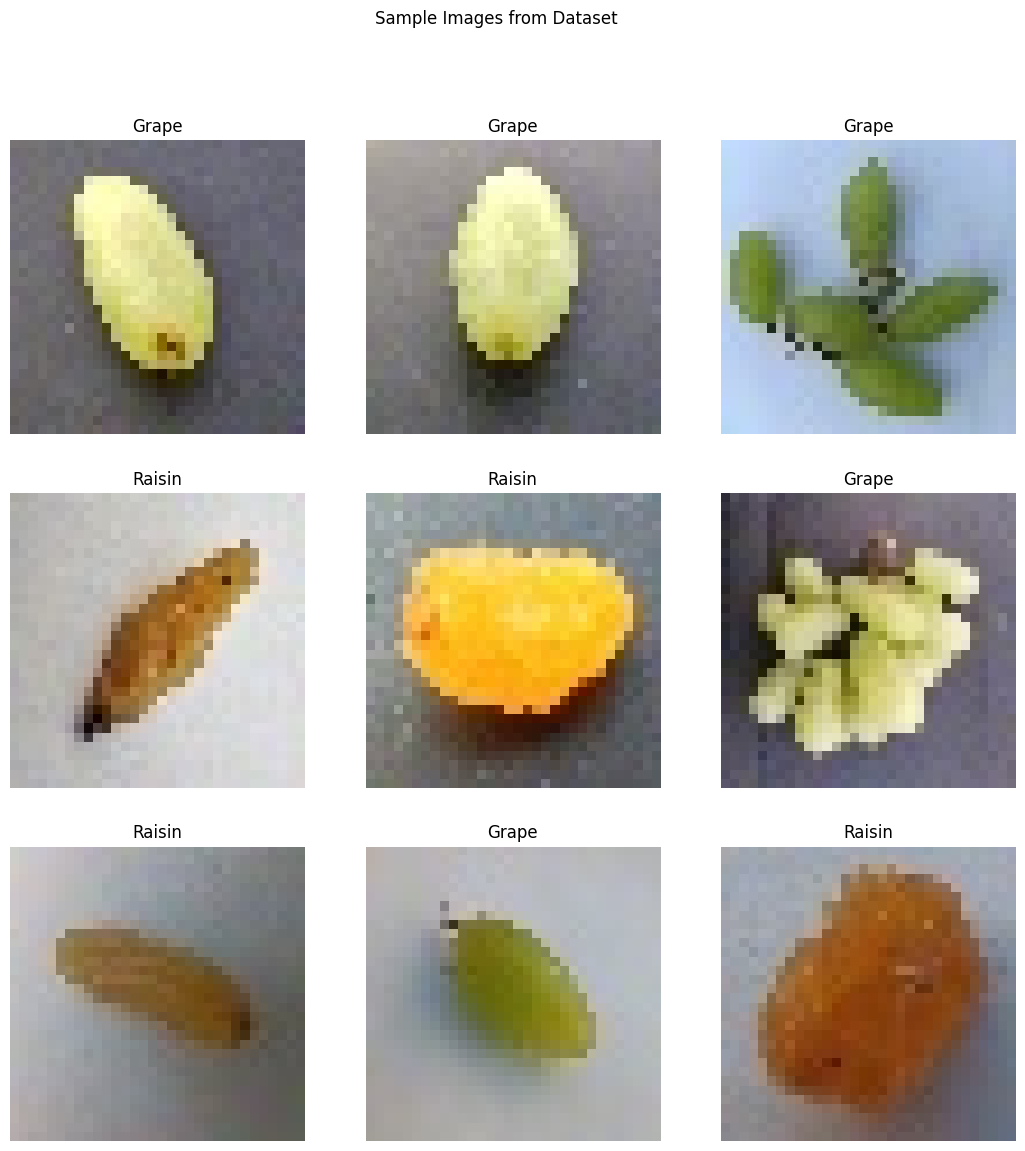

In [42]:
plt.figure(figsize = (13, 13))
for k in range(1, 10):
    plt.subplot(3, 3, k)
    plt.imshow(cv2.cvtColor(x_train[k], cv2.COLOR_BGR2RGB))
    plt.title(get_label(y_train[k]))
    plt.axis("off")

plt.suptitle("Sample Images from Dataset")
plt.show()

### Showing Training, Validation & Test Set Shape

In [43]:
print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (1070, 32, 32, 3) (1070,)
Validation set: (260, 32, 32, 3) (260,)
Test set: (420, 32, 32, 3) (420,)


### Building the Model

In [44]:
inputs = Input(shape = (32, 32, 3))
x = Conv2D(64, (3, 3), activation = "relu")(inputs)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = Conv2D(64, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation = "relu")(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation = "relu")(x)
x = Dense(256, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = Adam(0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 64)        36928     
                                                           

In [45]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))

Epoch 1/10
34/34 [==============================] - 5s 90ms/step - loss: 0.6276 - accuracy: 0.6617 - val_loss: 0.4434 - val_accuracy: 0.8308
Epoch 2/10
34/34 [==============================] - 3s 79ms/step - loss: 0.2514 - accuracy: 0.9019 - val_loss: 0.0693 - val_accuracy: 0.9769
Epoch 3/10
34/34 [==============================] - 3s 88ms/step - loss: 0.0327 - accuracy: 0.9907 - val_loss: 0.0753 - val_accuracy: 0.9808
Epoch 4/10
34/34 [==============================] - 3s 83ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0629 - val_accuracy: 0.9808
Epoch 5/10
34/34 [==============================] - 3s 86ms/step - loss: 0.0042 - accuracy: 0.9991 - val_loss: 0.1733 - val_accuracy: 0.9654
Epoch 6/10
34/34 [==============================] - 3s 76ms/step - loss: 0.0211 - accuracy: 0.9907 - val_loss: 0.1498 - val_accuracy: 0.9769
Epoch 7/10
34/34 [==============================] - 3s 78ms/step - loss: 0.0314 - accuracy: 0.9860 - val_loss: 0.0858 - val_accuracy: 0.9808
Epoch 8/10
34

### Plotting The Accuracy & Loss Graph

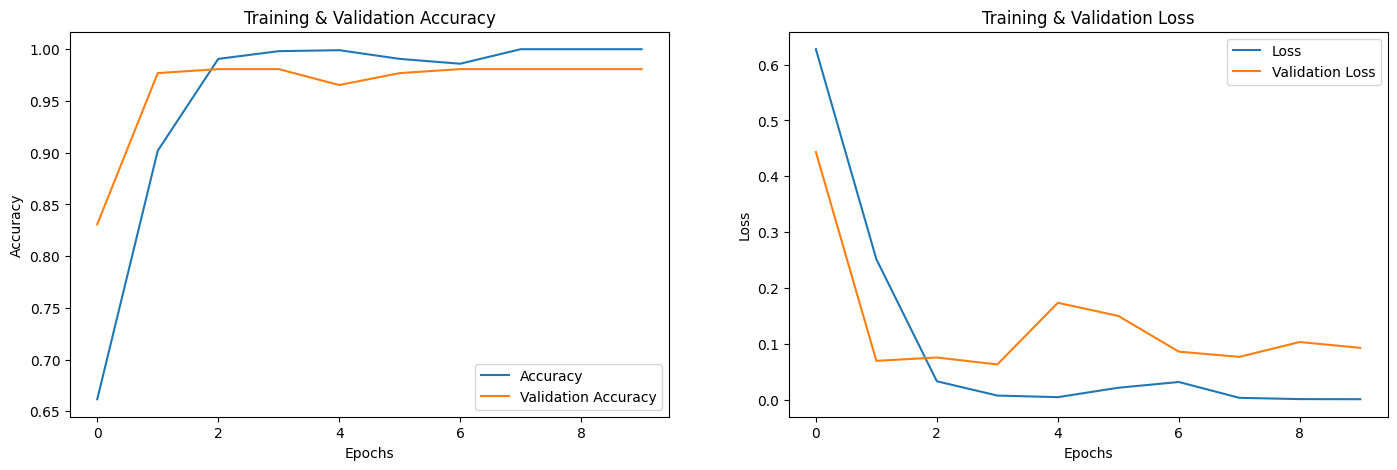

In [46]:
plt.figure(figsize = (17, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label = "Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label = "Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Evaluating the Model on Test Set

In [47]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {round(test_accuracy * 100, 2)}%")
print(f"Test Loss: {round(test_loss * 100, 2)}%")

14/14 [==============================] - 0s 19ms/step - loss: 1.2949 - accuracy: 0.7714
Test Accuracy: 77.14%
Test Loss: 129.49%
